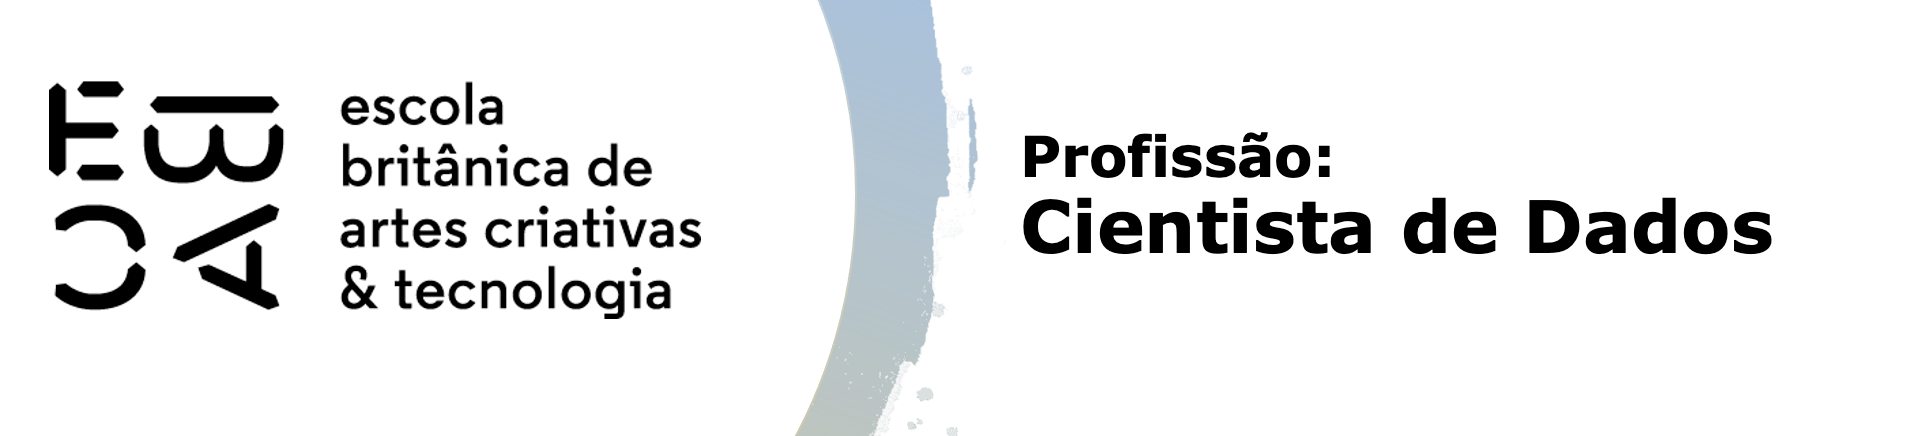

# Tarefa

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind

In [13]:
pg = sns.load_dataset('penguins')

In [3]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

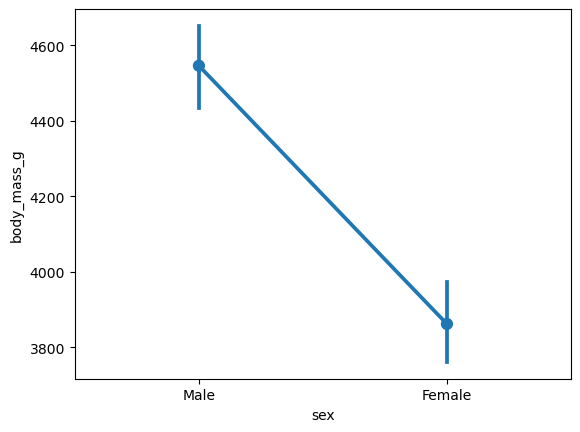

In [4]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

### 1.1 Comparação de Peso entre Machos e Fêmeas

Neste código, analisamos a diferença de peso corporal entre pinguins machos e fêmeas utilizando o teste \( t \) de Student, assumindo variâncias desiguais. Os dados do dataset `penguins` foram filtrados para remover valores nulos e separados em dois grupos: machos e fêmeas. O valor \( p \) resultante do teste foi comparado ao nível de significância \( \alpha = 0.05 \) para determinar se a diferença observada é estatisticamente significativa. O resultado indica se rejeitamos ou não a hipótese nula de que os pesos médios dos dois grupos são iguais.


In [8]:
# Carregar os dados dos pinguins
pg = sns.load_dataset('penguins')

# Remover valores nulos, se existirem
pg = pg.dropna(subset=['body_mass_g', 'sex'])

# Separar as amostras por sexo
male_body_mass = pg[pg['sex'] == 'Male']['body_mass_g']
female_body_mass = pg[pg['sex'] == 'Female']['body_mass_g']

# Realizar o teste T
t_stat, p_value = ttest_ind(male_body_mass, female_body_mass, equal_var=False)  # equal_var=False assume variâncias desiguais

# Resultados
print(f"Estatística T: {t_stat}")
print(f"Valor-p: {p_value}")

# Verificar a significância
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa no peso médio entre machos e fêmeas.")
else:
    print("Falhamos em rejeitar a hipótese nula. Não há evidências suficientes para concluir que existe uma diferença significativa.")


Estatística T: 8.554537231165762
Valor-p: 4.793891255051457e-16
Rejeitamos a hipótese nula. Há uma diferença significativa no peso médio entre machos e fêmeas.


### 1.2 Avaliação do Resultado

O teste \( t \) realizado resultou em uma estatística \( t \) de **8.55** e um valor \( p \) de **4.79 \times 10^{-16}**, muito menor que o nível de significância \( \alpha = 0.05 \). Com isso, rejeitamos a hipótese nula e concluímos que há uma diferença estatisticamente significativa no peso médio entre pinguins machos e fêmeas.


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

### 2.1 Explicação do Código

Este código realiza um **teste T bicaudal** para comparar a massa corporal média de pinguins machos e fêmeas, avaliando se há diferença significativa entre elas. Os principais passos são:

1. **Carregamento e limpeza dos dados**: Os dados do dataset `penguins` são filtrados para remover valores ausentes em `body_mass_g` e `sex`.
2. **Separação dos grupos**: Os valores de massa corporal (`body_mass_g`) são separados por sexo (macho e fêmea).
3. **Teste T**: O teste T independente é realizado com variâncias desiguais, gerando estatística T e valor-p.
4. **Distribuição T e regiões críticas**:
   - Calcula-se a distribuição T e os valores críticos para um nível de significância de 5%.
   - Plota-se a distribuição T, destacando as regiões críticas e o valor da estatística T calculada.
5. **Visualização**: O gráfico exibe a distribuição T, as regiões de aceitação e rejeição de H₀ (hipótese nula), e a posição da estatística T.

Este teste verifica se as médias de massa corporal dos dois grupos são estatisticamente diferentes.


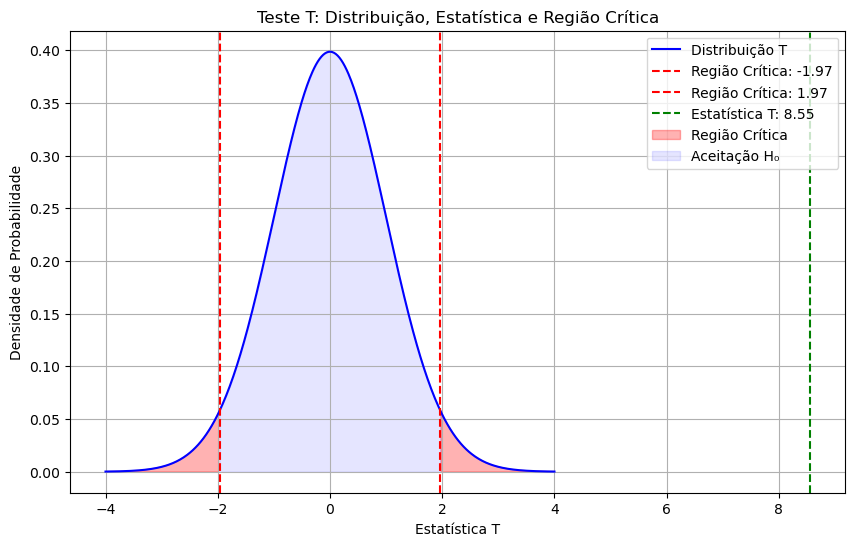

In [9]:
# Carregar os dados dos pinguins
pg = sns.load_dataset('penguins')
pg = pg.dropna(subset=['body_mass_g', 'sex'])

# Separar as amostras
male_body_mass = pg[pg['sex'] == 'Male']['body_mass_g']
female_body_mass = pg[pg['sex'] == 'Female']['body_mass_g']

# Realizar o teste T
t_stat, p_value = ttest_ind(male_body_mass, female_body_mass, equal_var=False)

# Parâmetros para a distribuição T
df = len(male_body_mass) + len(female_body_mass) - 2  # Aproximação do grau de liberdade
x = np.linspace(-4, 4, 500)  # Valores de T para o eixo x
t_dist = t.pdf(x, df)  # Densidade da distribuição T

# Valor crítico (bicaudal com 5% de significância)
alpha = 0.05
t_critical = t.ppf(1 - alpha / 2, df)

# Plotar a distribuição T
plt.figure(figsize=(10, 6))
plt.plot(x, t_dist, label="Distribuição T", color="blue")
plt.axvline(-t_critical, color="red", linestyle="--", label=f"Região Crítica: {-t_critical:.2f}")
plt.axvline(t_critical, color="red", linestyle="--", label=f"Região Crítica: {t_critical:.2f}")
plt.axvline(t_stat, color="green", linestyle="--", label=f"Estatística T: {t_stat:.2f}")

# Preencher as regiões críticas
plt.fill_between(x, t_dist, where=(x <= -t_critical) | (x >= t_critical), color="red", alpha=0.3, label="Região Crítica")
plt.fill_between(x, t_dist, where=(-t_critical < x) & (x < t_critical), color="blue", alpha=0.1, label="Aceitação H₀")

# Personalização
plt.title("Teste T: Distribuição, Estatística e Região Crítica")
plt.xlabel("Estatística T")
plt.ylabel("Densidade de Probabilidade")
plt.legend()
plt.grid()
plt.show()


### 2.2 Interpretação do Gráfico

O gráfico representa a **distribuição T** utilizada no teste T bicaudal para comparar a massa corporal média de pinguins machos e fêmeas. Os principais elementos são:

- **Distribuição T (linha azul):** Mostra a densidade de probabilidade das possíveis estatísticas T.
- **Regiões Críticas (linhas vermelhas tracejadas):** Definem os limites para rejeitar a hipótese nula (H₀) com 5% de significância. Valores fora de ±1.97 indicam evidência contra H₀.
- **Estatística T Calculada (linha verde tracejada):** O valor de T obtido (8.55) está muito além dos limites críticos, indicando uma diferença significativa entre as médias.
- **Preenchimento das Áreas:** As áreas em vermelho representam as regiões de rejeição de H₀, enquanto a área em azul claro representa a região de aceitação.

### Conclusão
Como a estatística T (8.55) está na região crítica, rejeitamos H₀, concluindo que há uma diferença significativa na massa corporal média entre pinguins machos e fêmeas.


## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

### 3.1 Explicação do Código

Este código realiza um **teste T bicaudal** para verificar se há diferença significativa na massa corporal média entre pinguins machos e fêmeas. Os principais passos são:

1. **Carregamento e limpeza dos dados**: O dataset `penguins` é carregado e filtrado para excluir valores nulos.
2. **Separação dos grupos**: Os dados de massa corporal são separados por sexo.
3. **Teste T**: O teste T é realizado considerando variâncias desiguais, gerando a estatística T e o valor-p.
4. **Distribuição T e visualização**:
   - Calcula-se a distribuição T e as regiões críticas com base no nível de significância de 5%.
   - Plota-se o gráfico com a distribuição, as regiões de aceitação e rejeição de H₀, além da estatística T calculada.

O gráfico ajuda a visualizar os resultados do teste, destacando se a estatística T cai na região crítica.


In [18]:
# Carregar os dados dos pinguins
pg = sns.load_dataset('penguins')

# Remover valores nulos, se existirem
pg = pg.dropna(subset=['body_mass_g', 'sex', 'species'])

# Criar uma lista para armazenar os resultados
results = []

# Iterar sobre cada espécie
for species in pg['species'].unique():
    # Filtrar os dados para a espécie atual
    subset = pg[pg['species'] == species]
    
    # Separar as amostras por sexo
    male_body_mass = subset[subset['sex'] == 'Male']['body_mass_g']
    female_body_mass = subset[subset['sex'] == 'Female']['body_mass_g']
    
    # Realizar o teste T, verificando se ambos os grupos não estão vazios
    if not male_body_mass.empty and not female_body_mass.empty:
        t_stat, p_value = ttest_ind(male_body_mass, female_body_mass, equal_var=False)  # Welch's t-test
        
        # Armazenar os resultados
        results.append({'species': species, 't_stat': t_stat, 'p_value': p_value})

# Converter os resultados em DataFrame
results_df = pd.DataFrame(results)

# Exibir os resultados
print(results_df)


     species     t_stat       p_value
0     Adelie  13.126286  6.402320e-26
1  Chinstrap   5.207734  2.264432e-06
2     Gentoo  14.761368  1.867760e-28


### 3.2 Resultados do Teste T por Espécie

Os resultados mostram a estatística T e o valor-p para cada espécie de pinguim, indicando diferenças significativas na massa corporal média entre machos e fêmeas:

- **Adelie**: Estatística T = 13.13, valor-p = 6.40e-26. Diferença altamente significativa.
- **Chinstrap**: Estatística T = 5.21, valor-p = 2.26e-06. Diferença significativa.
- **Gentoo**: Estatística T = 14.76, valor-p = 1.87e-28. Diferença altamente significativa.

### Conclusão
Os valores-p para todas as espécies são muito menores que 0.05, indicando evidência robusta para rejeitar a hipótese nula (H₀). Portanto, existe uma diferença significativa na massa corporal média entre machos e fêmeas para todas as espécies.
